# Librerias

In [1]:
!pip install pandasql==0.7.3

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26785 sha256=31c0428a9c7c7646849b8e04098f5c4d768e7334f6255c912778217695bb6d86
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
from sklearn.cluster import DBSCAN

# Importar Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ManuelArvayo/DataScience/main/Datasets/Training2019csvfile.csv')
df.head()

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
0,00-01,ARG1,30/07/2000,Boca Juniors,Argentinos Juniors,4,0,4,W
1,00-01,ARG1,30/07/2000,Chacarita Juniors,Union de Santa Fe,0,0,0,D
2,00-01,ARG1,30/07/2000,CA Colon,Huracan,1,1,0,D
3,00-01,ARG1,30/07/2000,Estudiantes,River Plate,1,1,0,D
4,00-01,ARG1,30/07/2000,Independiente,Belgrano Cordoba,0,0,0,D


# Analisis Exploratorio

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251392 entries, 0 to 251391
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Sea     251392 non-null  object
 1   Lge     251392 non-null  object
 2   Date    251392 non-null  object
 3   HT      251392 non-null  object
 4   AT      251392 non-null  object
 5   HS      251392 non-null  int64 
 6   AS      251392 non-null  int64 
 7   GD      251392 non-null  int64 
 8   WDL     251392 non-null  object
dtypes: int64(3), object(6)
memory usage: 17.3+ MB


In [5]:
df.shape

(251392, 9)

# Limpieza

In [6]:
seasons = sqldf("SELECT DISTINCT Sea FROM df")
seasons

,Sea
0,00-01
1,01-feb
2,02-mar
3,03-abr
4,04-may
5,05-jun
6,06-jul
7,07-ago
8,08-sep
9,09-oct


In [7]:
df['Lge'] = df['Lge'].replace({'mar-01':'MAR1'})
df['Sea'] = df['Sea'].replace({'01-feb':'01-02','02-mar':'02-03', '03-abr':'03-04','04-may':'04-05', '05-jun':'05-06', '06-jul':'06-07','07-ago':'07-08', '08-sep':'08-09', '09-oct':'09-10', '10-nov':'10-11', '11-dic':'11-12', 'dic-13':'12-13'})
df['WDL'] = df['WDL'].replace({'W':1,'D':0,'L':-1})
df['WDL'] = pd.to_numeric(df['WDL'])

In [8]:
seasons = sqldf("SELECT DISTINCT Sea FROM df")
seasons

,Sea
0,00-01
1,01-02
2,02-03
3,03-04
4,04-05
5,05-06
6,06-07
7,07-08
8,08-09
9,09-10


In [9]:
leagues = sqldf("SELECT DISTINCT Lge FROM df")
leagues

,Lge
0,ARG1
1,AUS1
2,AUT1
3,BEL1
4,BRA1
5,BRA2
6,CHE1
7,CHL1
8,CHN1
9,DNK1


# Crear Datos

In [10]:
df['Result'] = df['HS'].astype(str) + '-' + df['AS'].astype(str) 
print(df['Result'])

0         4-0
1         0-0
2         1-1
3         1-1
4         0-0
         ... 
251387    1-0
251388    0-1
251389    0-1
251390    3-0
251391    0-2
Name: Result, Length: 251392, dtype: object


In [11]:
ganados = pd.DataFrame(df[df['WDL']==1].groupby(by=['HT','Sea'])['WDL'].count())

In [12]:
perdidos = pd.DataFrame(df[df['WDL']==-1].groupby(by=['HT','Sea'])['WDL'].count())

In [13]:
empates = pd.DataFrame(df[df['WDL']==0].groupby(by=['HT','Sea'])['WDL'].count())

In [14]:
WL_hist = pd.merge(ganados, perdidos, how="left", on=["HT", "Sea"])
WL_hist = WL_hist.rename(columns={'WDL_x':'Ganados','WDL_y':'Perdidos'})

In [15]:
WDL_hist = pd.merge(WL_hist, empates, how="left", on=["HT", "Sea"])

In [16]:
WDL_hist = WDL_hist.rename(columns={'WDL':'Empates'})

In [17]:
WDL_hist = WDL_hist.sort_values(by =['HT','Sea'])
WDL_hist = WDL_hist.reset_index()
WDL_hist['Ganados'] = WDL_hist['Ganados'].fillna(0)
WDL_hist['Perdidos'] = WDL_hist['Perdidos'].fillna(0)
WDL_hist['Empates'] = WDL_hist['Empates'].fillna(0)

In [18]:
WDL_hist['Sea_start'] = WDL_hist['Sea'].str.slice(stop=2)
WDL_hist['Sea_end'] = WDL_hist['Sea'].str.slice(start=-2)

In [19]:
WDL_hist['rank'] = 0

# Crear Ranking

In [20]:
def calcular_rank(team):
    team_h = WDL_hist[WDL_hist['HT']==team]
    rank = 0
    for i in range(0,len(team_h)):
        if i != len(team_h)-1:
            if (team_h.iloc[i]['Sea_end'] != team_h.iloc[i+1]['Sea_start']):
                rank = 0
            rank = (rank)*0.2 + (team_h.iloc[i]['Ganados']*3 + team_h.iloc[i]['Perdidos']*0 + team_h.iloc[i]['Empates']*1)*.8
            team_h.iloc[i, 7] = rank
        else:
            rank = (rank)*0.2 + (team_h.iloc[i]['Ganados']*3 + team_h.iloc[i]['Perdidos']*0 + team_h.iloc[i]['Empates']*1)*.8
            team_h.iloc[i, 7] = rank
    WDL_hist[WDL_hist['HT']==team] = team_h

In [21]:
for i in WDL_hist['HT'].unique():
    calcular_rank(i)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [22]:
WDL_hist

,HT,Sea,Ganados,Perdidos,Empates,Sea_start,Sea_end,rank
0,ABC FC,11-12,7,2.0,10.0,11,12,24.800000
1,ABC FC,12-13,7,7.0,5.0,12,13,25.760000
2,ABC FC,13-14,11,3.0,5.0,13,14,35.552000
3,ABC FC,14-15,10,6.0,3.0,14,15,33.510400
4,ABC FC,15-16,2,8.0,9.0,15,16,12.000000
...,...,...,...,...,...,...,...,...
14245,Zwolle,14-15,11,2.0,4.0,14,15,33.856000
14246,Zwolle,15-16,10,5.0,2.0,15,16,32.371200
14247,Zwolle,16-17,5,7.0,5.0,16,17,22.474240
14248,Zwolle,17-18,8,5.0,4.0,17,18,26.894848


In [23]:
WDL_hist2 = WDL_hist.sort_values(by='rank',ascending=False)

In [24]:
local = sqldf("SELECT DISTINCT HT FROM WDL_hist2")
diccionario_equipos = {i:local for i in local}
diccionario_equipos

{'HT':                        HT
 0          Spartak Moscow
 1            FK Krasnodar
 2            Jubilo Iwata
 3             Yokohama FC
 4     Zenit St Petersburg
 ...                   ...
 1546                Medea
 1547     Olympique du Kef
 1548            Assyriska
 1549                Batna
 1550       Cuiaba Esporte
 
 [1551 rows x 1 columns]}

In [25]:
avgrank = WDL_hist.groupby(['HT']).mean()
avgrank['rank']=avgrank['rank']/100
avgrank.sort_values(by='rank',ascending=False)

,Ganados,Perdidos,Empates,rank
HT,,,,
Celtic Glasgow,15.105263,1.052632,2.473684,0.471943
Barcelona,14.631579,1.473684,2.894737,0.461515
Real Madrid,14.631579,2.052632,2.315789,0.456807
CS Emelec,13.615385,1.923077,4.692308,0.448903
Juventus,13.789474,1.526316,3.368421,0.440894
...,...,...,...,...
Medea,1.000000,2.000000,3.000000,0.048000
Olympique du Kef,1.000000,4.000000,2.000000,0.040000
Batna,1.000000,4.000000,1.000000,0.032000


In [26]:
figure = px.histogram(avgrank, 
                      x='rank', 
                      title='Ranking', 
                      labels={'x': 'Score', 'y': 'Count'})

figure.show()

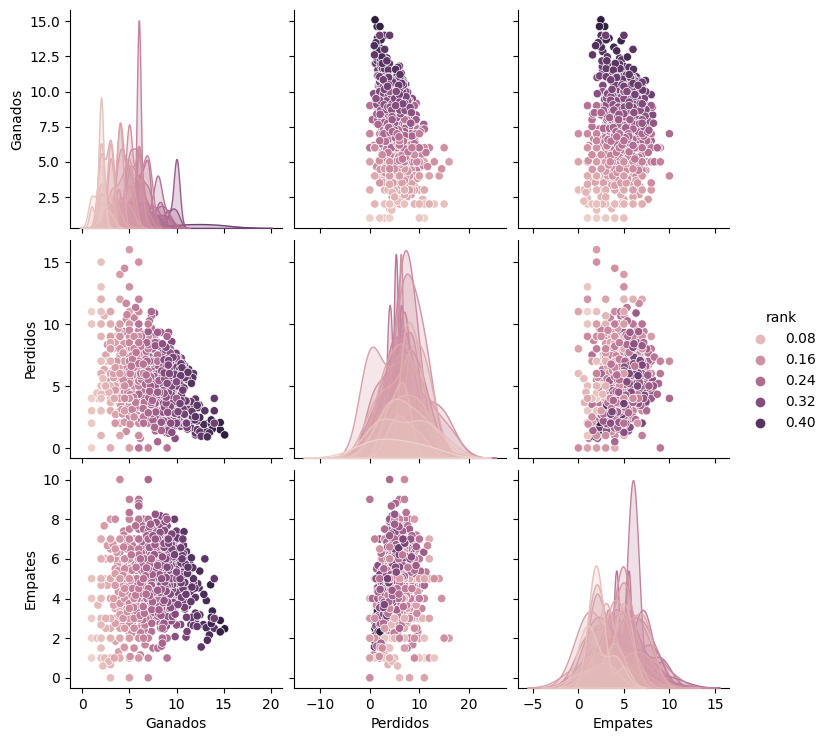

In [27]:
sns.pairplot(avgrank, hue="rank")

In [28]:
dfi = np.arange(len(avgrank))
avgrank['Index HT'] = dfi
avgrank.head()

,Ganados,Perdidos,Empates,rank,Index HT
HT,,,,,
ABC FC,7.333333,5.666667,6.000000,0.256704,0
AC Ajaccio,8.263158,4.947368,5.789474,0.302045,1
AC Barnechea,6.000000,10.000000,1.000000,0.152000,2
AC Lala FC,3.000000,4.000000,2.000000,0.088000,3
AC Milan,11.473684,2.842105,4.263158,0.381700,4


In [29]:
df_model = df.merge(avgrank, how='inner', on=['HT'])
df_model=df_model.rename({"rank":'Score HT'},axis=1)
df_model.head()

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,Result,Ganados,Perdidos,Empates,Score HT,Index HT
0,00-01,ARG1,30/07/2000,Boca Juniors,Argentinos Juniors,4,0,4,1,4-0,10.684211,2.473684,4.210526,0.358759,183
1,00-01,ARG1,20/08/2000,Boca Juniors,GyE La Plata,3,3,0,0,3-3,10.684211,2.473684,4.210526,0.358759,183
2,00-01,ARG1,06/09/2000,Boca Juniors,Racing Club,1,1,0,0,1-1,10.684211,2.473684,4.210526,0.358759,183
3,00-01,ARG1,17/09/2000,Boca Juniors,Club Almagro,2,0,2,1,2-0,10.684211,2.473684,4.210526,0.358759,183
4,00-01,ARG1,01/10/2000,Boca Juniors,CA Lanus,3,2,1,1,3-2,10.684211,2.473684,4.210526,0.358759,183


In [30]:
to_drop = ['Sea','Lge','Date','Result','Ganados','Perdidos','Empates']
df_model=df_model.drop(to_drop,axis=1)

In [31]:
teams = df['HT'].sort_values().drop_duplicates()
teams = teams[:len(avgrank)]
avgrank['Team'] = teams.tolist()

teams_set = set(teams)
avgrank_set = set(avgrank['Team'])

teams_not_in_avgrank = teams_set - avgrank_set
print("Teams not in avgrank:", teams_not_in_avgrank)

Teams not in avgrank: set()


In [32]:
avgrank.head()
avgrank.sort_values(by="rank",ascending=False)

,Ganados,Perdidos,Empates,rank,Index HT,Team
HT,,,,,,
Celtic Glasgow,15.105263,1.052632,2.473684,0.471943,283,Celta de Vigo
Barcelona,14.631579,1.473684,2.894737,0.461515,140,Baltika Kaliningrad
Real Madrid,14.631579,2.052632,2.315789,0.456807,1154,Reading
CS Emelec,13.615385,1.923077,4.692308,0.448903,250,CS Constantine
Juventus,13.789474,1.526316,3.368421,0.440894,771,Jubilo Iwata
...,...,...,...,...,...,...
Medea,1.000000,2.000000,3.000000,0.048000,934,Martigues
Olympique du Kef,1.000000,4.000000,2.000000,0.040000,1040,Olympique Medea
Batna,1.000000,4.000000,1.000000,0.032000,150,Bath City


In [34]:
all_teams = pd.concat([df['HT'], df['AT']]).unique()

team_index = pd.DataFrame({'Team': all_teams})
team_index['ID'] = range(1, len(all_teams) + 1)  # Assign numeric IDs starting from 1

merged_df = pd.merge(df, team_index, left_on='HT', right_on='Team', how='left')
merged_df.rename(columns={'ID': 'Index HT'}, inplace=True)

merged_df = pd.merge(merged_df, team_index, left_on='AT', right_on='Team', how='left')
merged_df.rename(columns={'ID': 'Index AT'}, inplace=True)

merged_df.drop(['Team_x', 'Team_y'], axis=1, inplace=True)


In [35]:
# Assuming you have the 'avgrank' dataframe with columns 'Team' and 'rank'

# Merge 'avgrank' with 'merged_df' for 'HT' and add 'Score HT'
merged_df = pd.merge(merged_df, avgrank[['Team', 'rank']], left_on='HT', right_on='Team', how='left')
merged_df.rename(columns={'rank': 'Score HT'}, inplace=True)

# Merge 'avgrank' with 'merged_df' for 'AT' and add 'Score AT'
merged_df = pd.merge(merged_df, avgrank[['Team', 'rank']], left_on='AT', right_on='Team', how='left')
merged_df.rename(columns={'rank': 'Score AT'}, inplace=True)

merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

column_name = 'HT'  # Replace with the actual column name
merged_df[column_name] = merged_df[column_name].map(diccionario_equipos[column_name].reset_index(drop=True).reset_index().set_index(column_name)['index'])



In [36]:
merged_df = merged_df.drop(["HT","AT","Sea","Lge","Date","Result","Team_x","Team_y"],axis=1)

In [80]:
df_model = merged_df.copy()
df_model.head()

,HS,AS,GD,WDL,Index HT,Index AT,Score HT,Score AT
0,4,0,4,1,1,12,0.253450,0.240147
1,0,0,0,0,2,20,0.221600,0.266400
2,1,1,0,0,3,15,0.303931,0.256000
3,1,1,0,0,4,19,0.192320,0.363009
4,0,0,0,0,5,13,0.166400,0.198187


In [53]:
df_model["WDL"].value_counts()

 1    113796
-1     69614
 0     67982
Name: WDL, dtype: int64

In [38]:
df_model.to_csv('DatasetSoccerForModeling2.csv')

In [81]:
df_model = df_model.dropna()

In [90]:
df_model = df_model.drop(["HS","AS","GD"],axis=1)

In [106]:
df["WDL"]= df["WDL"].replace(-1,2)

In [107]:
df["WDL"].value_counts()

1    113796
2     69614
0     67982
Name: WDL, dtype: int64

In [93]:
df_model.head()

,WDL,Index HT,Index AT,Score HT,Score AT
0,1,1,12,0.253450,0.240147
1,0,2,20,0.221600,0.266400
2,0,3,15,0.303931,0.256000
3,0,4,19,0.192320,0.363009
4,0,5,13,0.166400,0.198187


In [94]:
from sklearn.model_selection import train_test_split

# Dividir el DataFrame en variables de entrada (X) y variable objetivo (y)
X = df_model[['Index HT', 'Index AT', 'Score HT', 'Score AT']]
y = df_model['WDL']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
df_model['WDL'] = df_model['WDL'].map({1: 1, 0: 0, -1: 2})

In [115]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir el DataFrame en variables de entrada (X) y variable objetivo (y)
X = df_model[['Index HT', 'Index AT', 'Score HT', 'Score AT']]
y = df_model['WDL']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir los datos a tensores de PyTorch
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train.values)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test.values)

# Definir el modelo de red neuronal
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 3)  # 3 classes for WDL: 0, 1, 2

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Instanciar el modelo
model = Net()

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento del modelo
num_epochs = 10
batch_size = 64

for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size].long()

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss}")

# Evaluación del modelo en el conjunto de prueba
with torch.no_grad():
    outputs = model(X_test)
    predicted_labels = torch.argmax(outputs, dim=1)
    accuracy = (predicted_labels == y_test.long()).sum().item() / len(y_test)*100
    print(f"Accuracy on test set: {accuracy} %")


Epoch 1/20, Loss: 3350.6375680565834
Epoch 2/20, Loss: 3347.0541163682938
Epoch 3/20, Loss: 3339.505303144455
Epoch 4/20, Loss: 3332.558579146862
Epoch 5/20, Loss: 3330.2851818203926
Epoch 6/20, Loss: 3329.167876601219
Epoch 7/20, Loss: 3328.4360679388046
Epoch 8/20, Loss: 3327.47712212801
Epoch 9/20, Loss: 3326.7964133024216
Epoch 10/20, Loss: 3326.2020539045334
Epoch 11/20, Loss: 3325.762908220291
Epoch 12/20, Loss: 3325.330411016941
Epoch 13/20, Loss: 3325.0067186951637
Epoch 14/20, Loss: 3324.762819170952
Epoch 15/20, Loss: 3324.475494325161
Epoch 16/20, Loss: 3324.1858332157135
Epoch 17/20, Loss: 3323.8552694916725
Epoch 18/20, Loss: 3323.6212223768234
Epoch 19/20, Loss: 3323.267557144165
Epoch 20/20, Loss: 3322.9714752435684
Accuracy on test set: 45.483182805989195 %


In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Dividir el DataFrame en variables de entrada (X) y variable objetivo (y)
X = df_model[['Index HT', 'Index AT', 'Score HT', 'Score AT']]
y = df_model['WDL']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear una instancia del modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.4552


In [118]:
from sklearn.metrics import classification_report

# Generar un informe de clasificación para evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13429
           1       0.46      0.99      0.63     22828
           2       0.35      0.01      0.03     13900

    accuracy                           0.46     50157
   macro avg       0.27      0.34      0.22     50157
weighted avg       0.31      0.46      0.29     50157

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_cl

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)

# Crear el mapa de calor utilizando Seaborn
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Configurar los ejes del mapa de calor
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Mostrar la matriz de confusión
plt.show()

TypeError: 'numpy.ndarray' object is not callable

# Analisis

In [39]:
df['Result'].value_counts()/len(df['Result'])*100

1-1     12.502784
1-0     11.105365
2-1      9.019380
0-0      8.517375
2-0      7.811704
          ...    
10-2     0.000796
5-7      0.000398
11-3     0.000398
9-4      0.000398
0-10     0.000398
Name: Result, Length: 76, dtype: float64

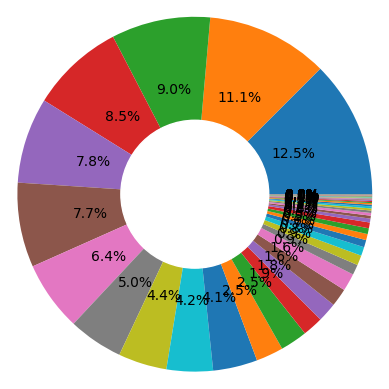

In [40]:
# pie plot
plt.pie(df['Result'].value_counts(), autopct = '%.1f%%', radius = 1.2)

# add a circle at the center
circle =  plt.Circle( (0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)
 
# display the plot
plt.show()

In [41]:
df.nunique()

Sea         20
Lge         52
Date      6524
HT        1554
AT        1554
HS          12
AS          11
GD          21
WDL          3
Result      76
dtype: int64

In [42]:
df.dtypes

Sea       object
Lge       object
Date      object
HT        object
AT        object
HS         int64
AS         int64
GD         int64
WDL        int64
Result    object
dtype: object

In [43]:
df.describe()

,HS,AS,GD,WDL
count,251392.000000,251392.000000,251392.000000,251392.000000
mean,1.479896,1.114491,0.365405,0.175749
std,1.249408,1.094660,1.669678,0.835878
min,0.000000,0.000000,-10.000000,-1.000000
25%,1.000000,0.000000,-1.000000,-1.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000
max,11.000000,10.000000,10.000000,1.000000


In [44]:
percent_W = df['WDL'].value_counts()
percent_W/len(df['WDL'])

 1    0.452664
-1    0.276914
 0    0.270422
Name: WDL, dtype: float64

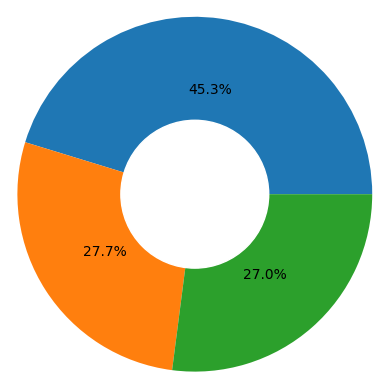

In [45]:
# pie plot
plt.pie(df['WDL'].value_counts(), autopct = '%.1f%%', radius = 1.2)

# add a circle at the center
circle =  plt.Circle( (0,0), 0.5, color='white')
plot = plt.gcf()
plot.gca().add_artist(circle)
 
# display the plot
plt.show()

In [46]:
df.isna().sum()

Sea       0
Lge       0
Date      0
HT        0
AT        0
HS        0
AS        0
GD        0
WDL       0
Result    0
dtype: int64

In [47]:
df['Date'] = pd.to_datetime(df['Date'])

In [48]:
df['Lge'].value_counts()

ENG3    10514
ENG4    10488
ENG2    10488
SPA2     8757
ITA2     8502
FRA2     7220
ENG1     7220
SPA1     7220
ARG1     7160
FRA1     7052
ENG5     6993
ITA1     6924
BRA1     6013
GER1     5814
HOL1     5778
GER2     5508
MEX1     5350
POR1     5256
TUR1     5168
BEL1     5090
JPN1     4669
CHL1     4566
RUS1     4533
GRE1     4503
SWE1     4337
CHN1     4245
SCO1     4242
GER3     4180
VEN1     3995
JPN2     3779
DNK1     3714
ZAF1     3600
RUS2     3579
USA1     3565
SCO3     3420
SCO2     3418
AUT1     3372
FRA3     3362
DZA1     3260
CHE1     3240
SCO4     3225
KOR1     3216
ISR1     3182
ECU1     3162
FIN1     3143
MAR1     3105
BRA2     3095
NOR1     2570
TUN1     2483
AUS1     2278
USA2      937
NZL1      902
Name: Lge, dtype: int64

In [49]:
len(df['Lge'].value_counts())

52

In [50]:
#Diccionario de equipos

local = sqldf("SELECT DISTINCT HT FROM df")
diccionario_equipos = {i:local for i in local}
print(diccionario_equipos)

{'HT':                      HT
0          Boca Juniors
1     Chacarita Juniors
2              CA Colon
3           Estudiantes
4         Independiente
...                 ...
1549   CR Vasco da Gama
1550            Tuks FC
1551      Chippa United
1552          Baroka FC
1553     Highlands Park

[1554 rows x 1 columns]}


In [51]:
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=79824a8e-00b0-4881-a9df-1348cb634c5a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>